# Mohamed Tarek

In [1]:
import os
import pandas as pd
import shutil
import tensorflow as tf
import cv2
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from keras import layers , metrics
from keras.models import Model, load_model
from keras.callbacks import  ModelCheckpoint ,ReduceLROnPlateau ,EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
from sklearn.model_selection import train_test_split
import keras
from PIL import Image 
tf.config.run_functions_eagerly(True)
from Evaluation_matrices import f1
from keras.preprocessing import image

# Data Paths: 

In [2]:
mask = os.listdir(r'E:\NU\internship\mask')
nomask = os.listdir(r'E:\NU\internship\nomask')

In [3]:
print("The number of images with facemask:",len(mask))
print("The number of images with no facemask:",len(nomask))
print("Total Number of dataset" , len(mask)+ len(nomask))

The number of images with facemask: 3725
The number of images with no facemask: 3828
Total Number of dataset 7553


# Prepare label

In [4]:
mask_labels = [1] * len(mask)

nomask_labels = [0] * len(nomask)

dataset_labels = mask_labels + nomask_labels

# Generate Image 

In [5]:
dataset = []

for img_file in mask:

  image = Image.open( 'E:/NU/internship/mask/' + img_file)
  image = image.resize((224,224))
  image = image.convert('RGB')
  image = np.array(image)
  dataset.append(image)

for img_file in nomask:

  image = Image.open('E:/NU/internship/nomask/' + img_file)
  image = image.resize((224,224))
  image = image.convert('RGB')
  image = np.array(image)
  dataset.append(image)

C:\Users\Mohamed\AppData\Roaming\Python\Python39\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
X = np.array(dataset)
Y = np.array(dataset_labels)

# Split Train data

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

# Normalize Train images

In [8]:
X_train = X_train/255
X_test = X_test/255
print(X_train.shape)
print(X_test.shape)

(6042, 224, 224, 3)
(1511, 224, 224, 3)


# Model Architecture:

In [9]:
model = keras.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(1, activation='sigmoid'))

# Metrics And Callbacks

In [10]:
checkpoint = ModelCheckpoint(r'E:\NU\internship\model\model', verbose=1, monitor ='val_loss',  save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
callbacks = [ checkpoint, reduce_lr,early_stop ]

opt = tf.keras.optimizers.experimental.Adam(1e-3)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['acc',f1])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                        

# Training 

In [11]:
history = model.fit(X_train, Y_train, validation_split=0.3, epochs=100 ,  batch_size=64,steps_per_epoch= 90 , callbacks=callbacks)
model.save_weights(r'E:\NU\internship\model\model')
model.save(r'E:\NU\internship\model\model\myodel.h5')

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 1.6879 - acc: 0.8330 - f1: 0.8351
Epoch 1: val_loss improved from inf to 2.30860, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 55s 364ms/step - loss: 1.6879 - acc: 0.8330 - f1: 0.8351 - val_loss: 2.3086 - val_acc: 0.5135 - val_f1: 0.0022 - lr: 0.0010
Epoch 2/100
90/90 [==============================] - ETA: 0s - loss: 1.2877 - acc: 0.9074 - f1: 0.9092
Epoch 2: val_loss improved from 2.30860 to 1.83562, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 30s 333ms/step - loss: 1.2877 - acc: 0.9074 - f1: 0.9092 - val_loss: 1.8356 - val_acc: 0.5378 - val_f1: 0.1020 - lr: 0.0010
Epoch 3/100
90/90 [==============================] - ETA: 0s - loss: 0.9651 - acc: 0.9241 - f1: 0.9231
Epoch 3: val_loss improved from 1.83562 to 1.49053, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 28s 311ms/step - loss: 0.9651 - acc: 0.9241 - f1: 0.9231 - val_loss: 1.4905 - val_acc: 0.6007 - val_f1: 0.3090 - lr: 0.0010
Epoch 4/100
90/90 [==============================] - ETA: 0s - loss: 0.8609 - acc: 0.9397 - f1: 0.9400
Epoch 4: val_loss improved from 1.49053 to 1.16892, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 28s 305ms/step - loss: 0.8609 - acc: 0.9397 - f1: 0.9400 - val_loss: 1.1689 - val_acc: 0.6977 - val_f1: 0.5544 - lr: 0.0010
Epoch 5/100
90/90 [==============================] - ETA: 0s - loss: 0.7317 - acc: 0.9447 - f1: 0.9450
Epoch 5: val_loss improved from 1.16892 to 0.84418, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 30s 331ms/step - loss: 0.7317 - acc: 0.9447 - f1: 0.9450 - val_loss: 0.8442 - val_acc: 0.8803 - val_f1: 0.8671 - lr: 0.0010
Epoch 6/100
90/90 [==============================] - ETA: 0s - loss: 0.8468 - acc: 0.9449 - f1: 0.9410
Epoch 6: val_loss did not improve from 0.84418
90/90 [==============================] - 25s 272ms/step - loss: 0.8468 - acc: 0.9449 - f1: 0.9410 - val_loss: 1.0809 - val_acc: 0.8660 - val_f1: 0.8651 - lr: 0.0010
Epoch 7/100
90/90 [==============================] - ETA: 0s - loss: 0.9714 - acc: 0.9333 - f1: 0.9292
Epoch 7: val_loss did not improve from 0.84418
90/90 [==============================] - 25s 276ms/step - loss: 0.9714 - acc: 0.9333 - f1: 0.9292 - val_loss: 2.1572 - val_acc: 0.6558 - val_f1: 0.6236 - lr: 0.0010
Epoch 8/100
90/90 [==============================] - ETA: 0s - loss: 1.0205 - acc: 0.9404 - f1: 0.9401
Epoch 8: val_loss did not improve from 0.84418

Epoch 8: ReduceLROnPlateau reducing learning rate to 0

INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 27s 303ms/step - loss: 0.7204 - acc: 0.9683 - f1: 0.9669 - val_loss: 0.7493 - val_acc: 0.9443 - val_f1: 0.9414 - lr: 1.0000e-04
Epoch 10/100
90/90 [==============================] - ETA: 0s - loss: 0.6370 - acc: 0.9839 - f1: 0.9781
Epoch 10: val_loss improved from 0.74932 to 0.69380, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 28s 311ms/step - loss: 0.6370 - acc: 0.9839 - f1: 0.9781 - val_loss: 0.6938 - val_acc: 0.9498 - val_f1: 0.9469 - lr: 1.0000e-04
Epoch 11/100
90/90 [==============================] - ETA: 0s - loss: 0.5816 - acc: 0.9884 - f1: 0.9888
Epoch 11: val_loss improved from 0.69380 to 0.63819, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 28s 312ms/step - loss: 0.5816 - acc: 0.9884 - f1: 0.9888 - val_loss: 0.6382 - val_acc: 0.9542 - val_f1: 0.9538 - lr: 1.0000e-04
Epoch 12/100
90/90 [==============================] - ETA: 0s - loss: 0.5299 - acc: 0.9910 - f1: 0.9872
Epoch 12: val_loss did not improve from 0.63819
90/90 [==============================] - 22s 241ms/step - loss: 0.5299 - acc: 0.9910 - f1: 0.9872 - val_loss: 0.6446 - val_acc: 0.9382 - val_f1: 0.9373 - lr: 1.0000e-04
Epoch 13/100
90/90 [==============================] - ETA: 0s - loss: 0.4883 - acc: 0.9933 - f1: 0.9935
Epoch 13: val_loss improved from 0.63819 to 0.56991, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 26s 293ms/step - loss: 0.4883 - acc: 0.9933 - f1: 0.9935 - val_loss: 0.5699 - val_acc: 0.9537 - val_f1: 0.9516 - lr: 1.0000e-04
Epoch 14/100
90/90 [==============================] - ETA: 0s - loss: 0.4613 - acc: 0.9911 - f1: 0.9873
Epoch 14: val_loss improved from 0.56991 to 0.56461, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 27s 295ms/step - loss: 0.4613 - acc: 0.9911 - f1: 0.9873 - val_loss: 0.5646 - val_acc: 0.9454 - val_f1: 0.9423 - lr: 1.0000e-04
Epoch 15/100
90/90 [==============================] - ETA: 0s - loss: 0.4331 - acc: 0.9945 - f1: 0.9944
Epoch 15: val_loss improved from 0.56461 to 0.53871, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 30s 331ms/step - loss: 0.4331 - acc: 0.9945 - f1: 0.9944 - val_loss: 0.5387 - val_acc: 0.9542 - val_f1: 0.9533 - lr: 1.0000e-04
Epoch 16/100
90/90 [==============================] - ETA: 0s - loss: 0.4019 - acc: 0.9949 - f1: 0.9946
Epoch 16: val_loss improved from 0.53871 to 0.52123, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 30s 330ms/step - loss: 0.4019 - acc: 0.9949 - f1: 0.9946 - val_loss: 0.5212 - val_acc: 0.9504 - val_f1: 0.9485 - lr: 1.0000e-04
Epoch 17/100
90/90 [==============================] - ETA: 0s - loss: 0.3826 - acc: 0.9951 - f1: 0.9938
Epoch 17: val_loss improved from 0.52123 to 0.49786, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 30s 331ms/step - loss: 0.3826 - acc: 0.9951 - f1: 0.9938 - val_loss: 0.4979 - val_acc: 0.9537 - val_f1: 0.9519 - lr: 1.0000e-04
Epoch 18/100
90/90 [==============================] - ETA: 0s - loss: 0.3765 - acc: 0.9926 - f1: 0.9874
Epoch 18: val_loss did not improve from 0.49786
90/90 [==============================] - 22s 246ms/step - loss: 0.3765 - acc: 0.9926 - f1: 0.9874 - val_loss: 0.5148 - val_acc: 0.9470 - val_f1: 0.9462 - lr: 1.0000e-04
Epoch 19/100
90/90 [==============================] - ETA: 0s - loss: 0.3608 - acc: 0.9947 - f1: 0.9945
Epoch 19: val_loss improved from 0.49786 to 0.48891, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 27s 296ms/step - loss: 0.3608 - acc: 0.9947 - f1: 0.9945 - val_loss: 0.4889 - val_acc: 0.9487 - val_f1: 0.9477 - lr: 1.0000e-04
Epoch 20/100
90/90 [==============================] - ETA: 0s - loss: 0.3708 - acc: 0.9879 - f1: 0.9822
Epoch 20: val_loss did not improve from 0.48891
90/90 [==============================] - 24s 263ms/step - loss: 0.3708 - acc: 0.9879 - f1: 0.9822 - val_loss: 0.4999 - val_acc: 0.9498 - val_f1: 0.9469 - lr: 1.0000e-04
Epoch 21/100
90/90 [==============================] - ETA: 0s - loss: 0.3663 - acc: 0.9926 - f1: 0.9924
Epoch 21: val_loss improved from 0.48891 to 0.47902, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 30s 335ms/step - loss: 0.3663 - acc: 0.9926 - f1: 0.9924 - val_loss: 0.4790 - val_acc: 0.9553 - val_f1: 0.9530 - lr: 1.0000e-04
Epoch 22/100
90/90 [==============================] - ETA: 0s - loss: 0.3476 - acc: 0.9944 - f1: 0.9945
Epoch 22: val_loss improved from 0.47902 to 0.47321, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 31s 345ms/step - loss: 0.3476 - acc: 0.9944 - f1: 0.9945 - val_loss: 0.4732 - val_acc: 0.9520 - val_f1: 0.9483 - lr: 1.0000e-04
Epoch 23/100
90/90 [==============================] - ETA: 0s - loss: 0.3471 - acc: 0.9900 - f1: 0.9865
Epoch 23: val_loss improved from 0.47321 to 0.47235, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 30s 332ms/step - loss: 0.3471 - acc: 0.9900 - f1: 0.9865 - val_loss: 0.4723 - val_acc: 0.9437 - val_f1: 0.9433 - lr: 1.0000e-04
Epoch 24/100
90/90 [==============================] - ETA: 0s - loss: 0.3357 - acc: 0.9934 - f1: 0.9939
Epoch 24: val_loss improved from 0.47235 to 0.45595, saving model to E:\NU\internship\model\model


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


INFO:tensorflow:Assets written to: E:\NU\internship\model\model\assets


90/90 [==============================] - 31s 342ms/step - loss: 0.3357 - acc: 0.9934 - f1: 0.9939 - val_loss: 0.4559 - val_acc: 0.9504 - val_f1: 0.9498 - lr: 1.0000e-04
Epoch 25/100
90/90 [==============================] - ETA: 0s - loss: 0.3270 - acc: 0.9932 - f1: 0.9907
Epoch 25: val_loss did not improve from 0.45595
90/90 [==============================] - 25s 282ms/step - loss: 0.3270 - acc: 0.9932 - f1: 0.9907 - val_loss: 0.4698 - val_acc: 0.9476 - val_f1: 0.9444 - lr: 1.0000e-04
Epoch 26/100
90/90 [==============================] - ETA: 0s - loss: 0.3288 - acc: 0.9914 - f1: 0.9892
Epoch 26: val_loss did not improve from 0.45595
90/90 [==============================] - 26s 287ms/step - loss: 0.3288 - acc: 0.9914 - f1: 0.9892 - val_loss: 0.4746 - val_acc: 0.9459 - val_f1: 0.9452 - lr: 1.0000e-04
Epoch 27/100
90/90 [==============================] - ETA: 0s - loss: 0.3347 - acc: 0.9906 - f1: 0.9885
Epoch 27: val_loss did not improve from 0.45595

Epoch 27: ReduceLROnPlateau reducing

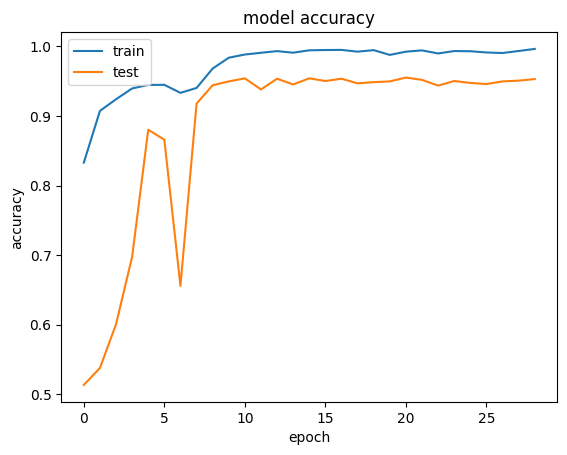

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

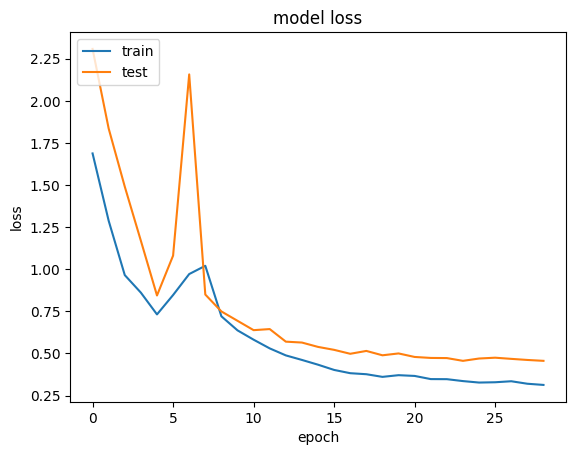

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

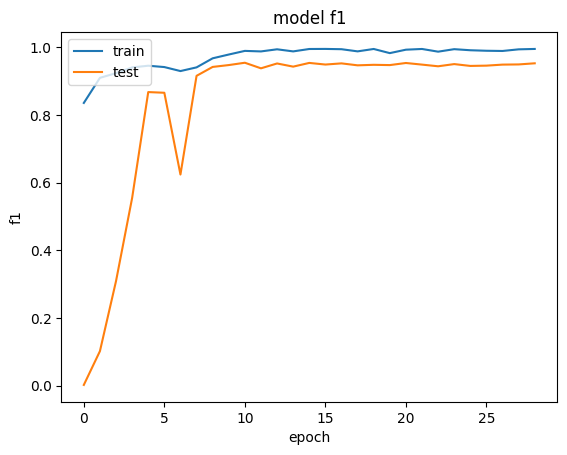

In [14]:
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluate and prediction

In [11]:
model.load_weights(r'E:\NU\internship\model\model')
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['acc',f1])
evaluate = model.evaluate(X_test, Y_test,batch_size= 64, verbose=1,)


C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 21s 68ms/step - loss: 0.4666 - acc: 0.9523 - f1: 0.9508


In [12]:
predict = model.predict(X_test)


48/48 [==============================] - 1s 24ms/step


In [17]:
pr = predict[3]
print(pr)
if pr < 0.5:
    print('not wearing mask')


[0.00118374]
not wearing mask


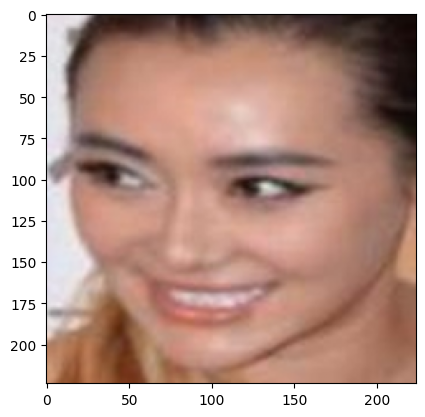

In [18]:
img = X_test[3]
plt.imshow(img)


In [19]:
pr = predict[10]
print(pr)
if pr > 0.5:
    print('wearing mask')

[0.99512684]
wearing mask


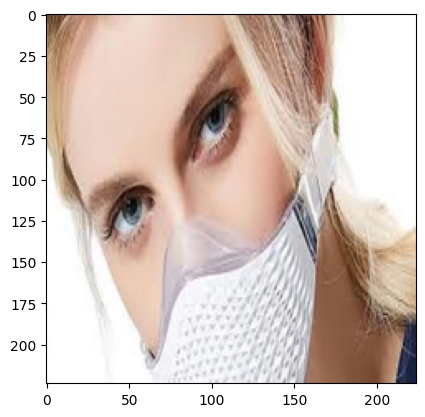

In [20]:
img = X_test[10]
plt.imshow(img)

# confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred = model.predict(X_test)
Y_pred_classes = np.round(Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred_classes)


48/48 [==============================] - 2s 31ms/step


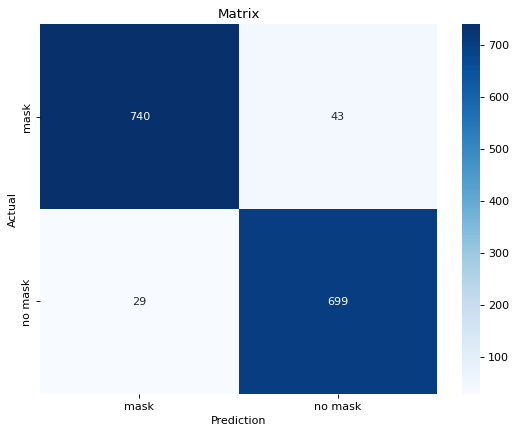

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       783
           1       0.94      0.96      0.95       728

    accuracy                           0.95      1511
   macro avg       0.95      0.95      0.95      1511
weighted avg       0.95      0.95      0.95      1511



In [22]:
import seaborn as sns
conf_matrix = confusion_matrix(Y_test, Y_pred_classes)

# Set the labels for the x and y axes
xticklabels = ['mask', 'no mask']
yticklabels = ['mask', 'no mask']

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# Create the heatmap
sns.heatmap(conf_matrix, cmap="Blues", annot=True, fmt='d', xticklabels=xticklabels, yticklabels=yticklabels)

plt.title('Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_classes))

# Real time for model

using camera 

In [29]:
# Load the pre-trained Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start capturing video from the default camera (0)
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face region
        face_roi = frame[y:y + h, x:x + w]
        # Resize the face to match the input size of your model (128x128)
        face_roi = cv2.resize(face_roi, (224, 224))
        # Preprocess the face (similar to what you did with the training data)
        face_roi = cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)
        face_roi = face_roi / 255.0  # Normalize
        face_roi = np.expand_dims(face_roi, axis=0)  # Add batch dimension

        # Use the model to predict whether the person is wearing a mask
        prediction = model.predict(face_roi)
        label =prediction
        print(label)

        # Display the result on the frame
        if label > 0.5:  # Assuming 1 corresponds to wearing a mask
            cv2.putText(frame, "Mask", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        else:
            cv2.putText(frame, "No Mask", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Display the frame
    cv2.imshow('Face Mask Detection', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


using video

In [16]:
# Load the pre-trained Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
video_path = r'E:\NU\internship\output_video.mp4'
# Start capturing video from the default camera (0)
cap = cv2.VideoCapture(video_path)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()
    if not ret:
        print("End of video or error reading frame.")
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face region
        face_roi = frame[y:y + h, x:x + w]
        # Resize the face to match the input size of your model (128x128)
        face_roi = cv2.resize(face_roi, (224, 224))
        # Preprocess the face (similar to what you did with the training data)
        face_roi = cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)
        face_roi = face_roi / 255.0  # Normalize
        face_roi = np.expand_dims(face_roi, axis=0)  # Add batch dimension

        # Use the model to predict whether the person is wearing a mask
        prediction = model.predict(face_roi)
        label =prediction
        print(label)

        # Display the result on the frame
        if label > 0.5:  # Assuming 1 corresponds to wearing a mask
            print('wearing mask')
            cv2.putText(frame, "Mask", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        else:
            print('not wearing mask')
            cv2.putText(frame, "No Mask", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
            

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Display the frame
    cv2.imshow('Face Mask Detection', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 22ms/step
[[0.99965847]]
wearing mask
1/1 [==============================] - 0s 22ms/step
[[0.9996444]]
wearing mask
1/1 [==============================] - 0s 21ms/step
[[0.9997186]]
wearing mask
1/1 [==============================] - 0s 21ms/step
[[0.9996598]]
wearing mask
1/1 [==============================] - 0s 21ms/step
[[0.9996476]]
wearing mask
1/1 [==============================] - 0s 21ms/step
[[0.99963355]]
wearing mask
1/1 [==============================] - 0s 22ms/step
[[0.9997459]]
wearing mask
1/1 [==============================] - 0s 22ms/step
[[0.9997627]]
wearing mask
1/1 [==============================] - 0s 21ms/step
[[0.9997453]]
wearing mask
1/1 [==============================] - 0s 22ms/step
[[0.9997379]]
wearing mask
1/1 [==============================] - 0s 22ms/step
[[0.9997584]]
wearing mask
1/1 [==============================] - 0s 21ms/step
[[0.99974567]]
wearing mask
1/1 [==============================] - 0s 22ms/st

1/1 [==============================] - 0s 20ms/step
[[0.00372654]]
not wearing mask
1/1 [==============================] - 0s 20ms/step
[[0.00446213]]
not wearing mask
1/1 [==============================] - 0s 21ms/step
[[0.00692751]]
not wearing mask
1/1 [==============================] - 0s 20ms/step
[[0.00592551]]
not wearing mask
End of video or error reading frame.
